# Álgebra Linear e Representação de Dados

## Introdução

Nosso objetivo é solidificar os alicerces matemáticos e computacionais indispensáveis para a compreensão e aplicação dos algoritmos de aprendizagem não supervisionada. Abordaremos os conceitos de Álgebra Linear, como vetores e matrizes, que são a linguagem fundamental para representar dados, e as operações sobre eles, que formam a base de muitos algoritmos. Utilizaremos a biblioteca `NumPy` para a implementação computacional eficiente desses conceitos. Em seguida, exploraremos como visualizar dados e resultados utilizando `Matplotlib`, para a interpretação e análise exploratória de dados.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Configurações para uma melhor visualização dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# 1. Álgebra Linear

A Álgebra Linear é um ramo da matemática que lida com espaços vetoriais e transformações lineares. Em Machine Learning, ela é fundamental para a representação de dados e a formulação de algoritmos.

## 1.1 Vetores

### Definição e Notação

Um vetor é definido como um elemento de um espaço vetorial. No contexto de dados, um vetor-coluna $\mathbf{v} \in \mathbb{R}^{n \times 1}$ ou um vetor-linha $\mathbf{v}^T \in \mathbb{R}^{1 \times n}$ representa uma observação ou um ponto em um espaço n-dimensional. Cada elemento $v_i$ do vetor corresponde ao valor da $i$-ésima característica (ou atributo).

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} \quad \text{(vetor-coluna)}
\qquad
\mathbf{v}^T = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix} \quad \text{(vetor-linha)}
$$

In [2]:
# Vetor-linha (o padrão do NumPy ao criar arrays 1D)
v_row = np.array([1, 2, 3])
print(f"Vetor-linha: {v_row}")
print(f"Shape do vetor-linha: {v_row.shape}\n")

Vetor-linha: [1 2 3]
Shape do vetor-linha: (3,)



In [3]:
# Para criar um vetor-coluna explicitamente, podemos usar reshape ou newaxis
v_col = np.array([1, 2, 3]).reshape(-1, 1)
# Alternativa: v_col = np.array([[1], [2], [3]])
print(f"Vetor-coluna:\n{v_col}")
print(f"Shape do vetor-coluna: {v_col.shape}")

Vetor-coluna:
[[1]
 [2]
 [3]]
Shape do vetor-coluna: (3, 1)


### Indexação de Vetores

A indexação permite acessar elementos individuais ou subconjuntos de um vetor.  
No NumPy, os índices começam em **0** (diferente da notação matemática, que geralmente começa em 1).

- **Acesso por índice único**: retorna um elemento do vetor.  
- **Slice (fatiamento)**: retorna um intervalo de elementos.  
- **Indexação negativa**: permite acessar elementos a partir do final.  

Exemplo matemático de um vetor $\mathbf{v} \in \mathbb{R}^5$:

$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ v_3 \\ v_4 \\ v_5 \end{bmatrix}
$$

In [4]:
v = np.array([10, 20, 30, 40, 50])
print("Vetor v:", v)

Vetor v: [10 20 30 40 50]


In [5]:
# Acesso por índice
print("v[0] =", v[0])   # primeiro elemento
print("v[2] =", v[2])     # terceiro elemento

v[0] = 10
v[2] = 30


In [6]:
# Indexação negativa
print("v[-1] =", v[-1]) # último elemento
print("v[-2] =", v[-2])   # penúltimo elemento

v[-1] = 50
v[-2] = 40


In [7]:
# Slice (fatiamento)
print("\nv[1:4] =", v[1:4])   # elementos do índice 1 até 3
print("v[:3] =", v[:3])       # primeiros três elementos
print("v[2:] =", v[2:])       # do terceiro até o fim


v[1:4] = [20 30 40]
v[:3] = [10 20 30]
v[2:] = [30 40 50]


### Representação Gráfica de Vetores

Em um espaço 2D ou 3D, podemos visualizar um vetor como uma seta partindo da origem $(0,0)$ e terminando no ponto definido por suas coordenadas. Ele pode ser interpretado tanto como uma posição no espaço quanto como um deslocamento.

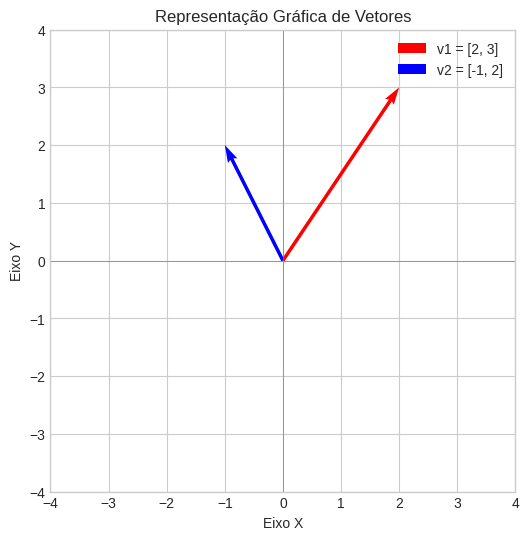

In [8]:
# Representação gráfica de vetores 2D
v1 = np.array([2, 3])
v2 = np.array([-1, 2])

# Plotando os vetores
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1 = [2, 3]')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2 = [-1, 2]')

# Configurações do gráfico
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()
plt.title("Representação Gráfica de Vetores")
plt.show()

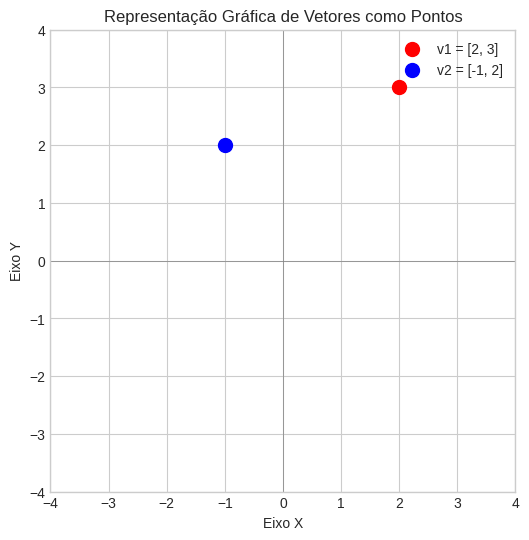

In [9]:
# Vetores como pontos
plt.figure(figsize=(6, 6))
plt.scatter(v1[0], v1[1], color='r', label='v1 = [2, 3]', s=100)
plt.scatter(v2[0], v2[1], color='b', label='v2 = [-1, 2]', s=100)

# Configurações do gráfico
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()
plt.title("Representação Gráfica de Vetores como Pontos")
plt.show()

### Vetores como Representação de Dados

No contexto da ciência de dados e machine learning, a interpretação de um vetor vai além de uma seta no espaço. Um vetor é a forma fundamental de representar uma única **amostra** (ou **exemplo**, **observação**) do nosso conjunto de dados.

Cada elemento dentro do vetor corresponde a uma **feature** (ou **atributo**, **característica**) dessa amostra. A quantidade de elementos no vetor define sua **dimensionalidade**, que é, portanto, o número de features que estamos usando para descrever nossa amostra.

Por exemplo, se estivermos analisando dados de imóveis, poderíamos descrever uma única casa usando um vetor de 3 dimensões:

$$
\text{casa}_A = \begin{bmatrix} \text{área (m²)} \\ \text{número de quartos} \\ \text{distância do centro (km)} \end{bmatrix} = \begin{bmatrix} 120 \\ 3 \\ 2.5 \end{bmatrix}
$$

Neste caso:
- O vetor $\begin{bmatrix} 120 & 3 & 2.5 \end{bmatrix}^T$ representa a **amostra** "casa A".
- As 3 **dimensões** do vetor correspondem às 3 **features** que medimos.
- O valor `120` é o valor da primeira feature (área) para esta amostra específica.

Essa representação nos permite usar o poder da matemática para comparar amostras. Por exemplo, podemos calcular a "distância" entre os vetores de duas casas para quantificar o quão similares elas são.

### Operações Básicas com Vetores

Sejam dois vetores $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$ e um escalar $c \in \mathbb{R}$.

- **Soma de Vetores**: A soma $\mathbf{u} + \mathbf{v}$ é realizada elemento a elemento. Geometricamente, corresponde à regra do paralelogramo.
$$\mathbf{u} + \mathbf{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}$$

- **Multiplicação por Escalar**: A multiplicação $c\mathbf{v}$ escala o vetor, aumentando ou diminuindo sua magnitude. Se $c < 0$, o sentido do vetor é invertido.
$$c\mathbf{v} = \begin{bmatrix} cv_1 \\ cv_2 \\ \vdots \\ cv_n \end{bmatrix}$$

In [10]:
u = np.array([1, 4])
v = np.array([3, 1])
c = 2

# Soma
sum_vec = u + v
print(f"u + v = {sum_vec}")

# Multiplicação por escalar
scaled_vec = c * u
print(f"c * u = {scaled_vec}")

u + v = [4 5]
c * u = [2 8]


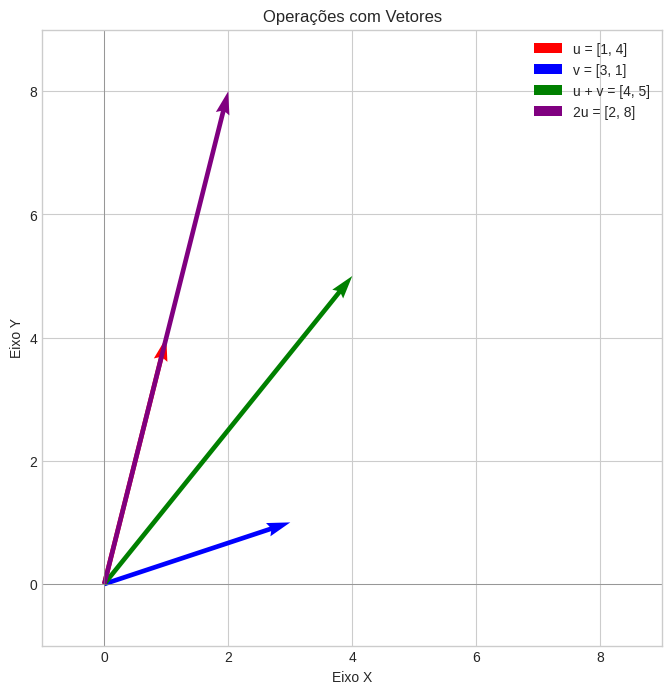

In [11]:
# Visualização das operações
plt.figure(figsize=(8, 8))
# Vetores originais
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='r', label='u = [1, 4]')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='b', label='v = [3, 1]')
# Resultado da soma
plt.quiver(0, 0, sum_vec[0], sum_vec[1], angles='xy', scale_units='xy', scale=1, color='g', label='u + v = [4, 5]')
# Resultado da multiplicação por escalar
plt.quiver(0, 0, scaled_vec[0], scaled_vec[1], angles='xy', scale_units='xy', scale=1, color='purple', label='2u = [2, 8]')

plt.xlim(-1, 9)
plt.ylim(-1, 9)
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()
plt.title("Operações com Vetores")
plt.show()

## Exercício: Vetores como Representação de Dados

Considere o contexto de **produção industrial**, onde cada vetor representa a quantidade de produtos fabricados em uma linha de produção por dia.  
Cada vetor possui 3 atributos (features):

1. Número de **parafusos** produzidos  
2. Número de **porcas** produzidas  
3. Número de **arruelas** produzidas  

Dadas as seguintes produções:

$$
\text{dia}_A = \begin{bmatrix} 500 \\ 300 \\ 200 \end{bmatrix}, \quad
\text{dia}_B = \begin{bmatrix} 400 \\ 250 \\ 150 \end{bmatrix}, \quad
\text{dia}_C = \begin{bmatrix} 1000 \\ 600 \\ 400 \end{bmatrix}
$$

1. Calcule $\text{dia}_A + \text{dia}_B$.

2. Calcule $3 \cdot \text{dia}_B$.

3. Uma empresa deseja prever a produção em um **dia especial** que será uma mistura de 2 vezes o padrão do dia $A$ e 1 vez o padrão do dia $B$. Isso corresponde a calcular:  

   $$
   \mathbf{dia}_{especial} = 2 \cdot \mathbf{dia}_A + 1 \cdot \mathbf{dia}_B
   $$

Calcule o vetor resultante dessa combinação linear.

In [12]:
import numpy as np

# Definindo os vetores de produção
dia_A = np.array([500, 300, 200])
dia_B = np.array([400, 250, 150])

# 1. Calcular dia_A + dia_B
soma_producao = dia_A + dia_B
print(f"Produção total (dia_A + dia_B): {soma_producao}\n")

# 2. Calcular 3 * dia_B
producao_multiplicada = 3 * dia_B
print(f"Produção multiplicada (3 * dia_B): {producao_multiplicada}\n")

# 3. Calcular a combinação linear 2 * dia_A + 1 * dia_B
dia_especial = 2 * dia_A + 1 * dia_B
print(f"Produção do dia especial: {dia_especial}")

Produção total (dia_A + dia_B): [900 550 350]

Produção multiplicada (3 * dia_B): [1200  750  450]

Produção do dia especial: [1400  850  550]


### Norma de Vetores

A norma de um vetor, denotada por $\|\mathbf{v}\|$, é uma função que atribui um comprimento ou magnitude positiva ao vetor.

- **Norma L2 (Euclidiana)**: É a mais comum e corresponde à noção intuitiva de comprimento no espaço Euclidiano.
$$\|\mathbf{v}\|_2 = \sqrt{\sum_{i=1}^{n} v_i^2} = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}$$

- **Norma L1 (Manhattan)**: Também conhecida como distância do táxi, é a soma dos valores absolutos dos componentes do vetor.
$$\|\mathbf{v}\|_1 = \sum_{i=1}^{n} |v_i|$$

In [13]:
v = np.array([3, -4])

# Norma L2
norm_l2 = np.linalg.norm(v, 2)
print(f"Vetor v: {v}")
print(f"Norma L2 de v: {norm_l2}")

# Norma L1
norm_l1 = np.linalg.norm(v, 1)
print(f"Norma L1 de v: {norm_l1}")

Vetor v: [ 3 -4]
Norma L2 de v: 5.0
Norma L1 de v: 7.0


### Normalização de Vetores

A normalização de um vetor consiste em dividi-lo pela sua norma (ou comprimento), de forma que o vetor resultante tenha magnitude igual a 1, mas mantenha a mesma direção.  
Dado um vetor $\mathbf{u} \in \mathbb{R}^n$, sua versão normalizada é:

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{\|\mathbf{u}\|_2}
$$

In [14]:
u = np.array([3, 4])
v = np.array([1, -2])

# Norma (comprimento) dos vetores
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)

# Normalização
u_normalized = u / norm_u
v_normalized = v / norm_v

print(f"Vetor original u = {u}, norma = {norm_u:.2f}")
print(f"Vetor normalizado û = {u_normalized}")

print(f"Vetor original v = {v}, norma = {norm_v:.2f}")
print(f"Vetor normalizado v̂ = {v_normalized}")

# Verificação: norma do vetor normalizado = 1
print(f"||û|| = {np.linalg.norm(u_normalized):.2f}")
print(f"||v̂|| = {np.linalg.norm(v_normalized):.2f}")

Vetor original u = [3 4], norma = 5.00
Vetor normalizado û = [0.6 0.8]
Vetor original v = [ 1 -2], norma = 2.24
Vetor normalizado v̂ = [ 0.4472136  -0.89442719]
||û|| = 1.00
||v̂|| = 1.00


### Produto Interno (Dot Product)

O produto interno (ou produto escalar) de dois vetores $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$ é definido como:

$$\mathbf{u} \cdot \mathbf{v} = \mathbf{u}^T \mathbf{v} = \sum_{i=1}^{n} u_i v_i$$

Ele possui uma importante relação geométrica com o ângulo $\theta$ entre os dois vetores:

$$\mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\|_2 \|\mathbf{v}\|_2 \cos(\theta)$$

A partir dessa relação, podemos inferir que:
- Se $\mathbf{u} \cdot \mathbf{v} > 0$, o ângulo $\theta$ é agudo ($< 90^\circ$).
- Se $\mathbf{u} \cdot \mathbf{v} < 0$, o ângulo $\theta$ é obtuso ($> 90^\circ$).
- Se $\mathbf{u} \cdot \mathbf{v} = 0$, os vetores são ortogonais ($\theta = 90^\circ$).

In [15]:
u = np.array([2, 2])
v = np.array([3, -3])
w = np.array([-4, -2])

# Cálculo do produto interno
dot_uv = np.dot(u, v)
print(f"Produto interno u . v = {dot_uv} (vetores ortogonais)")

dot_uw = np.dot(u, w)
print(f"Produto interno u . w = {dot_uw} (mesma direção, sentidos opostos)")

# Verificação via numpy
print(f"u @ v = {u @ v}")

Produto interno u . v = 0 (vetores ortogonais)
Produto interno u . w = -12 (mesma direção, sentidos opostos)
u @ v = 0


## 1.2 Matrizes

### Definição e Notação

Uma matriz $A \in \mathbb{R}^{m \times n}$ é um arranjo retangular de números com $m$ linhas e $n$ colunas. Ela é fundamental para representar conjuntos de dados (onde linhas podem ser amostras e colunas, atributos) e transformações lineares.

$$
A = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
$$

In [16]:
# Criando matrizes com NumPy
A = np.array([[1, 2, 3],
              [4, 5, 6]])

print(f"Matriz A:\n{A}")
print(f"Shape da matriz A: {A.shape}")

Matriz A:
[[1 2 3]
 [4 5 6]]
Shape da matriz A: (2, 3)


### Indexação de Matrizes

A indexação em matrizes permite acessar elementos individuais, linhas, colunas ou submatrizes.  
No NumPy, a convenção é `A[i, j]`, onde `i` é o índice da **linha** e `j` o índice da **coluna**, ambos começando em **0**.

Exemplo de uma matriz $A \in \mathbb{R}^{3 \times 3}$:

$$
A = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{pmatrix}
$$

- **Elemento individual**: `A[i, j]` retorna o valor na linha `i`, coluna `j`.  
- **Linha inteira**: `A[i, :]` retorna todos os elementos da linha `i`.  
- **Coluna inteira**: `A[:, j]` retorna todos os elementos da coluna `j`.  
- **Submatriz (slice)**: `A[i:j, k:l]` retorna o bloco da linha `i` até `j-1` e da coluna `k` até `l-1`.  

In [17]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print("Matriz A:\n", A)

Matriz A:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [18]:
# Elemento individual
print("A[0, 1] =", A[0, 1])   # elemento da 1ª linha, 2ª coluna

A[0, 1] = 2


In [19]:
# Linha inteira
print("A[1, :] =", A[1, :])     # 2ª linha

A[1, :] = [4 5 6]


In [20]:
# Coluna inteira
print("A[:, 2] =", A[:, 2])     # 3ª coluna

A[:, 2] = [3 6 9]


In [21]:
# Submatriz (linhas 0 a 1, colunas 1 a 2)
print("A[0:2, 1:3] =\n", A[0:2, 1:3])

A[0:2, 1:3] =
 [[2 3]
 [5 6]]


### Indexação em Múltiplas Dimensões

A ideia de indexar elementos, fatias (slices) ou subestruturas pode ser estendida para tensores de **qualquer dimensão**:

- **1D (vetor)**: `v[i]` → acessa o elemento na posição `i`.  
- **2D (matriz)**: `A[i, j]` → acessa o elemento na linha `i`, coluna `j`.  
- **3D (tensor)**: `T[i, j, k]` → acessa o elemento na posição `(i, j, k)`.  
- **nD (tensor de ordem n)**: `X[i1, i2, ..., in]` → acessa o elemento na posição indicada por todos os índices.  

Do mesmo modo, podemos usar `:` (slices) em cada eixo para pegar **fatias** de qualquer dimensão.

In [22]:
# Criando um tensor 3D (2 blocos, cada um com 3x3)
T = np.arange(18).reshape(2, 3, 3)
print("Tensor T (shape = 2x3x3):\n", T)

Tensor T (shape = 2x3x3):
 [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]


In [23]:
# Acessando um elemento individual (bloco 1, linha 2, coluna 0)
print("T[1, 2, 0] =", T[1, 2, 0])

# Acessando uma "linha" inteira no primeiro bloco
print("\nT[0, 1, :] =", T[0, 1, :])

# Acessando uma "coluna" inteira em todos os blocos
print("\nT[:, :, 2] =\n", T[:, :, 2])

# Acessando um "bloco" inteiro
print("\nT[1, :, :] =\n", T[1, :, :])

T[1, 2, 0] = 15

T[0, 1, :] = [3 4 5]

T[:, :, 2] =
 [[ 2  5  8]
 [11 14 17]]

T[1, :, :] =
 [[ 9 10 11]
 [12 13 14]
 [15 16 17]]


### Operações de Redução em Matrizes

Assim como em vetores, podemos aplicar operações de redução em matrizes.  
Essas operações resumem os valores da matriz em **um único número** ou em **valores agregados por linha ou coluna**.

- **Soma Total**: soma de todos os elementos da matriz.  
  $ \text{sum}(A) = \sum_{i=1}^m \sum_{j=1}^n a_{ij} $

- **Média Total**: média de todos os elementos.  
  $ \text{mean}(A) = \frac{1}{mn} \sum_{i=1}^m \sum_{j=1}^n a_{ij} $  

- **Soma/Média por Coluna (`axis=0`)**: reduz ao longo das linhas, retornando um vetor com uma operação por **coluna**.  

- **Soma/Média por Linha (`axis=1`)**: reduz ao longo das colunas, retornando um vetor com uma operação por **linha**.  

Essas operações são muito usadas em ciência de dados, por exemplo, para calcular estatísticas de atributos (colunas) ou de amostras (linhas).

In [24]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

print("Matriz A:")
print(A)

Matriz A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [25]:
# Operações globais
print("Soma total:", np.sum(A))
print("Média total:", np.mean(A))

Soma total: 45
Média total: 5.0


In [26]:
# Operações por eixo
print("Soma por coluna (axis=0):", np.sum(A, axis=0))
print("Média por coluna (axis=0):", np.mean(A, axis=0))

Soma por coluna (axis=0): [12 15 18]
Média por coluna (axis=0): [4. 5. 6.]


In [27]:
print("Soma por linha (axis=1):", np.sum(A, axis=1))
print("Média por linha (axis=1):", np.mean(A, axis=1))

Soma por linha (axis=1): [ 6 15 24]
Média por linha (axis=1): [2. 5. 8.]


### Multiplicação Matriz-Vetor

A multiplicação de uma matriz $A \in \mathbb{R}^{m \times n}$ por um vetor $\mathbf{x} \in \mathbb{R}^{n \times 1}$ resulta em um novo vetor $\mathbf{y} \in \mathbb{R}^{m \times 1}$. Essa operação pode ser interpretada como uma **transformação linear**, que mapeia o vetor $\mathbf{x}$ do espaço $\mathbb{R}^n$ para o espaço $\mathbb{R}^m$. Em outras palavras, a matriz $A$ "atua" sobre o vetor $\mathbf{x}$ e o "transforma" no vetor $\mathbf{y}$.

$$\mathbf{y} = A\mathbf{x}$$

Vamos ver um exemplo simples de transformação: o escalonamento. Podemos usar uma matriz para esticar ou encolher um vetor em diferentes direções.

In [28]:
# Transformação Linear: Escalonamento
# Esta matriz irá dobrar a componente x e manter a componente y
S = np.array([[2, 0],
              [0, 1]])

p = np.array([1, 2]) # Vetor original

# Aplicando a transformação (multiplicação matriz-vetor)
p_scaled = S @ p # O operador @ denota multiplicação de matrizes em NumPy

print(f"Vetor original p: {p}")
print(f"Matriz de Escalonamento S:\n{S}")
print(f"Vetor escalonado p': {p_scaled}")

Vetor original p: [1 2]
Matriz de Escalonamento S:
[[2 0]
 [0 1]]
Vetor escalonado p': [2 2]


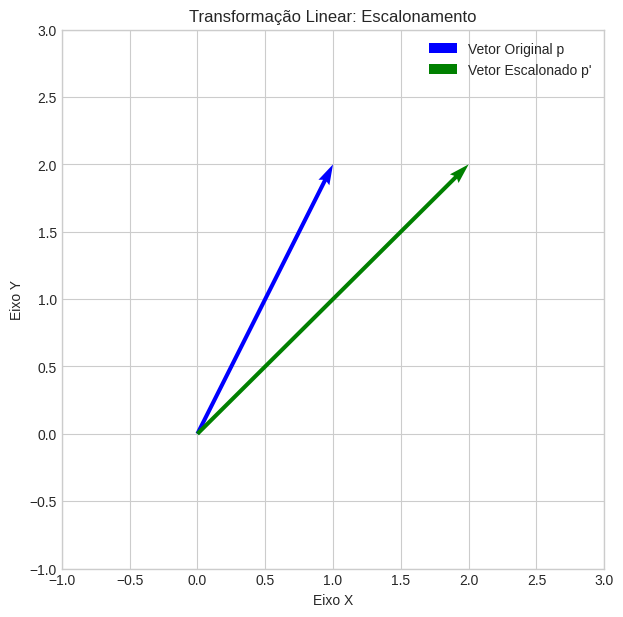

In [29]:
# Visualização
plt.figure(figsize=(7,7))
plt.quiver(0, 0, p[0], p[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vetor Original p')
plt.quiver(0, 0, p_scaled[0], p_scaled[1], angles='xy', scale_units='xy', scale=1, color='g', label="Vetor Escalonado p'")

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.title("Transformação Linear: Escalonamento")
plt.legend()
plt.grid(True)
plt.show()

## Exercícios

**Cenário: Perfil de Recomendação de Músicas**

Um sistema de streaming caracteriza músicas por `energia` e `dançabilidade` (valores de 0 a 1). O gosto de um usuário, "Bia", é representado por um vetor de preferência  

$$
\mathbf{p} = [0.8, \, 0.3],
$$

indicando que ela gosta de músicas energéticas, mas não tão dançantes.

1. **Normalização dos Vetores**  
   Calcule a norma de cada vetor ($\mathbf{p}, \mathbf{m}_A, \mathbf{m}_B$) e normalize-os dividindo cada vetor pela sua norma.  
   - Música A (Rock): $$\mathbf{m}_A = [0.9, \, 0.2]$$  
   - Música B (Pop): $$\mathbf{m}_B = [0.7, \, 0.9]$$  

   Compare os vetores originais e os normalizados: houve mudanças relevantes de interpretação?

2. **Alinhamento por Produto Interno**  
   Calcule o produto interno entre o vetor de preferência $\mathbf{p}$ e cada vetor de música:  

   $$
   \mathbf{p} \cdot \mathbf{m}_A, \quad \mathbf{p} \cdot \mathbf{m}_B
   $$

   Qual produto interno é maior? Com base apenas neste resultado, qual música o sistema deveria recomendar?

3. **Transformação de Perfil**  
   Para incentivar Bia a explorar novas músicas, o sistema aplica uma transformação que aumenta a preferência por dançabilidade:  

   $$
   T = \begin{pmatrix} 1 & 0 \\ 0.4 & 1 \end{pmatrix}
   $$

   Calcule o novo vetor de preferência de Bia:  

   $$
   \mathbf{p'} = T \mathbf{p}.
   $$

   Normalize $\mathbf{p'}$ e discuta como o vetor mudou em relação ao original. Qual aspecto do gosto foi reforçado?

In [48]:
import numpy as np

# Vamos imaginar um sistema de streaming que entende o nosso gosto musical.
# Ele usa números para isso!
# Energia (0 a 1): Se a música é agitada ou calma.
# Dançabilidade (0 a 1): Se a música nos faz querer dançar.

# O gosto da nossa amiga Bia, em um "vetor de preferência":
# Gosta de músicas energéticas (0.8), mas não tanto de dançantes (0.3).
gosto_da_bia = np.array([0.8, 0.3])

# As músicas que queremos recomendar:
musica_a_rock = np.array([0.9, 0.2]) # Bem energética, pouco dançante (Rock)
musica_b_pop = np.array([0.7, 0.9])  # Moderadamente energética, muito dançante (Pop)

print("--- Cenário: Entendendo o Gosto Musical da Bia com a Matemática ---")

# ### 1. Normalizando os Vetores (Tornando-os 'Justos')
# Isso é como ajustar a escala para que todos os vetores tenham o mesmo "tamanho",
# o que nos ajuda a compará-los pela direção, e não pela intensidade.

def normalizar_vetor(vetor, nome_vetor):
    """Calcula o 'tamanho' do vetor e o ajusta para 1."""
    tamanho_do_vetor = np.linalg.norm(vetor)
    vetor_justo = vetor / tamanho_do_vetor

    print(f"O gosto original de {nome_vetor} é: {vetor}")
    print(f"O 'tamanho' dele é: {tamanho_do_vetor:.4f}")
    print(f"O vetor 'justo' (normalizado) é: {vetor_justo.round(4)}\n")

    return vetor_justo

# Vamos normalizar o gosto da Bia e das músicas
gosto_da_bia_norm = normalizar_vetor(gosto_da_bia, "Bia")
musica_a_norm = normalizar_vetor(musica_a_rock, "Música A (Rock)")
musica_b_norm = normalizar_vetor(musica_b_pop, "Música B (Pop)")

# ---
# ### 2. Alinhamento: Qual Música Combina Mais com a Bia?
# Usamos o 'produto interno' (ou produto escalar) para ver quão "alinhados" estão
# o gosto da Bia e o perfil de cada música. Quanto maior o valor, mais parecidos são!
# ---

alinhamento_com_musica_a = np.dot(gosto_da_bia, musica_a_rock)
alinhamento_com_musica_b = np.dot(gosto_da_bia, musica_b_pop)

print(f"A combinação do gosto da Bia com a Música A (Rock) é: {alinhamento_com_musica_a:.4f}")
print(f"A combinação do gosto da Bia com a Música B (Pop) é: {alinhamento_com_musica_b:.4f}")

if alinhamento_com_musica_a > alinhamento_com_musica_b:
    print(f"\nO Rock combina mais! A Música A está mais alinhada com o gosto da Bia e seria a melhor recomendação inicial.")
else:
    print(f"\nO Pop combina mais! A Música B está mais alinhada com o gosto da Bia e seria a melhor recomendação inicial.")

# ---
# ### 3. Transformando o Perfil para Sugerir Coisas Novas
# Para que a Bia explore novos estilos, o sistema aplica uma "transformação".
# Uma matriz nos ajuda a mudar o perfil dela, incentivando-a a gostar de músicas mais dançantes.
# ---

matriz_de_transformacao = np.array([[1, 0], [0.4, 1]])

# Aplicando a transformação no gosto da Bia
novo_gosto_da_bia = matriz_de_transformacao @ gosto_da_bia

print(f"O novo perfil da Bia, após a transformação, é: {novo_gosto_da_bia.round(4)}")

# Agora, vamos ver o novo perfil 'justo' (normalizado)
novo_gosto_da_bia_norm = normalizar_vetor(novo_gosto_da_bia, "novo perfil da Bia")

# O que mudou?
print("--- Discussão da Mudança ---")
print("O perfil da Bia mudou significativamente! Antes, ela gostava muito de energia (0.8) e pouco de dançabilidade (0.3).")
print("Com a transformação, a preferência por 'dançabilidade' aumentou muito (de 0.3 para 0.62).")
print("Isso acontece porque a matriz adicionou 0.4 * a preferência por energia dela ao valor de dançabilidade.")
print("O sistema está ativamente incentivando a Bia a curtir músicas mais dançantes. Inteligente, não é?")

--- Cenário: Entendendo o Gosto Musical da Bia com a Matemática ---
O gosto original de Bia é: [0.8 0.3]
O 'tamanho' dele é: 0.8544
O vetor 'justo' (normalizado) é: [0.9363 0.3511]

O gosto original de Música A (Rock) é: [0.9 0.2]
O 'tamanho' dele é: 0.9220
O vetor 'justo' (normalizado) é: [0.9762 0.2169]

O gosto original de Música B (Pop) é: [0.7 0.9]
O 'tamanho' dele é: 1.1402
O vetor 'justo' (normalizado) é: [0.6139 0.7894]

A combinação do gosto da Bia com a Música A (Rock) é: 0.7800
A combinação do gosto da Bia com a Música B (Pop) é: 0.8300

O Pop combina mais! A Música B está mais alinhada com o gosto da Bia e seria a melhor recomendação inicial.
O novo perfil da Bia, após a transformação, é: [0.8  0.62]
O gosto original de novo perfil da Bia é: [0.8  0.62]
O 'tamanho' dele é: 1.0121
O vetor 'justo' (normalizado) é: [0.7904 0.6126]

--- Discussão da Mudança ---
O perfil da Bia mudou significativamente! Antes, ela gostava muito de energia (0.8) e pouco de dançabilidade (0.3).
Co

# 2. Distâncias e Similaridades

Em aprendizagem não supervisionada, a noção de "proximidade" é central. Medimos essa proximidade usando métricas de distância ou de similaridade.

## 2.1 Distância Euclidiana

Corresponde à norma L2 da diferença entre dois vetores $\mathbf{p}$ e $\mathbf{q}$. É a distância em linha reta entre dois pontos.

$$d_E(\mathbf{p}, \mathbf{q}) = \|\mathbf{p} - \mathbf{q}\|_2 = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

Distância Euclidiana entre p e q: 5.00


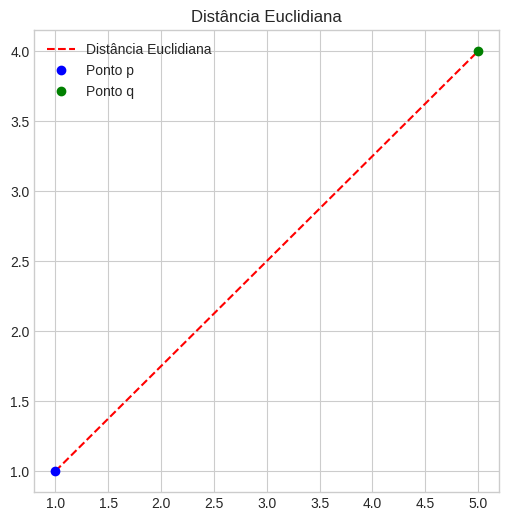

In [30]:
p = np.array([1, 1])
q = np.array([5, 4])

dist_euclidiana = np.linalg.norm(p - q)
print(f"Distância Euclidiana entre p e q: {dist_euclidiana:.2f}")

# Visualização
plt.figure(figsize=(6,6))
plt.plot([p[0], q[0]], [p[1], q[1]], 'r--', label='Distância Euclidiana')
plt.plot(p[0], p[1], 'bo', label='Ponto p')
plt.plot(q[0], q[1], 'go', label='Ponto q')
plt.title("Distância Euclidiana")
plt.legend()
plt.grid(True)
plt.show()

## 2.2 Similaridade do Cosseno

Enquanto a distância Euclidiana mede a separação espacial, a similaridade do cosseno mede a similaridade de orientação (ângulo) entre dois vetores, independentemente de suas magnitudes. Ela é calculada a partir da equação do produto interno:

$$\text{sim}(\mathbf{u}, \mathbf{v}) = \cos(\theta) = \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\|_2 \|\mathbf{v}\|_2}$$

O valor varia de -1 (vetores exatamente opostos) a 1 (vetores com mesma orientação). Um valor de 0 indica ortogonalidade. É amplamente utilizada em processamento de texto, onde a magnitude do vetor (e.g., contagem de palavras) pode ser menos importante que a proporção das palavras.

In [31]:
# Vetores representando documentos
doc1 = np.array([1, 1, 0, 1, 0]) # Documento sobre "machine learning"
doc2 = np.array([1, 1, 1, 0, 0]) # Documento sobre "deep learning"
doc3 = np.array([0, 0, 0, 0, 5]) # Documento sobre "sports"

def cosine_similarity(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product / (norm_u * norm_v)

sim_12 = cosine_similarity(doc1, doc2)
sim_13 = cosine_similarity(doc1, doc3)

print(f"Similaridade entre doc1 e doc2: {sim_12:.2f} (Relativamente similares)")
print(f"Similaridade entre doc1 e doc3: {sim_13:.2f} (Não similares/ortogonais)")

Similaridade entre doc1 e doc2: 0.67 (Relativamente similares)
Similaridade entre doc1 e doc3: 0.00 (Não similares/ortogonais)


## Exercícios

**Cenário: Similaridade em um Sistema de Recomendação**

Nos sistemas de recomendação modernos, raramente utilizamos atributos explícitos e criados por humanos, como `gênero=Ação` ou `diretor=Nolan`. Em vez disso, os algoritmos aprendem representações vetoriais densas tanto para usuários quanto para itens. Esses vetores são chamados de **embeddings**. As dimensões desses vetores, conhecidas como **features latentes**, não possuem um significado direto e interpretável para nós. Por exemplo, a 15ª dimensão do vetor de um filme não representa "nível de comédia", mas sim um padrão abstrato de características que o modelo descobriu ser útil para distinguir os gostos dos usuários.

Um sistema de recomendação representa filmes usando duas features latentes. Um filme assistido por um usuário servirá como referência para a próxima sugestão.

* Filme de Referência: `filme_ref = [0.95, 0.20]`
* Candidato A: `filme_A = [0.88, 0.25]`
* Candidato B: `filme_B = [0.48, 0.10]`

1. A **Distância Euclidiana** mede a "proximidade" geral entre os filmes neste espaço de features. Uma distância menor indica maior similaridade. Calcule a distância do `filme_ref` para cada candidato. Qual deles é o mais próximo?

2. A **Similaridade de Cosseno** mede se os filmes compartilham um "perfil" similar, ou seja, a mesma proporção entre as features, independentemente de suas magnitudes. Um valor próximo de 1 indica um perfil muito alinhado. Calcule a similaridade de cosseno do `filme_ref` para cada candidato. Qual deles tem o perfil mais similar? A recomendação seria a mesma usando esta métrica?

In [47]:
import numpy as np

# Definindo os vetores (embeddings) dos filmes
filme_ref = np.array([0.95, 0.20])
filme_A = np.array([0.88, 0.25])
filme_B = np.array([0.48, 0.10])

print("--- Cenário: Similaridade em um Sistema de Recomendação ---")
print(f"Filme de Referência: {filme_ref}")
print(f"Candidato A: {filme_A}")
print(f"Candidato B: {filme_B}\n")


# 1. Distância Euclidiana
# A Distância Euclidiana é a medida de "proximidade" no espaço.
# É a forma mais direta de medir a distância entre dois pontos.

# Distância entre filme_ref e filme_A
# np.linalg.norm calcula a distância L2 (Euclidiana) entre dois vetores.
distancia_euclidiana_A = np.linalg.norm(filme_ref - filme_A)

# Distância entre filme_ref e filme_B
distancia_euclidiana_B = np.linalg.norm(filme_ref - filme_B)

print("### 1. Distância Euclidiana")
print(f"Distância entre o Filme de Referência e o Candidato A: {distancia_euclidiana_A:.4f}")
print(f"Distância entre o Filme de Referência e o Candidato B: {distancia_euclidiana_B:.4f}")

# A menor distância indica maior similaridade.
if distancia_euclidiana_A < distancia_euclidiana_B:
    print("\nO Candidato A é o mais próximo do filme de referência.")
else:
    print("\nO Candidato B é o mais próximo do filme de referência.")

print("A distância euclidiana considera a magnitude das features. Nesse caso, a diferença total entre os valores é menor para o Candidato A.")

# 2. Similaridade de Cosseno
# A Similaridade de Cosseno mede o "alinhamento" dos vetores, ignorando o seu tamanho.
# Um valor mais próximo de 1 significa que os vetores apontam na mesma direção.

# Função para calcular a similaridade de cosseno
def similaridade_de_cosseno(v1, v2):
    dot_product = np.dot(v1, v2)
    norma_v1 = np.linalg.norm(v1)
    norma_v2 = np.linalg.norm(v2)
    return dot_product / (norma_v1 * norma_v2)

similaridade_cosseno_A = similaridade_de_cosseno(filme_ref, filme_A)
similaridade_cosseno_B = similaridade_de_cosseno(filme_ref, filme_B)

print("\n### 2. Similaridade de Cosseno")
print(f"Similaridade de Cosseno com o Candidato A: {similaridade_cosseno_A:.4f}")
print(f"Similaridade de Cosseno com o Candidato B: {similaridade_cosseno_B:.4f}")

# O maior valor de similaridade indica o maior alinhamento de perfil.
if similaridade_cosseno_A > similaridade_cosseno_B:
    print("\nO Candidato A tem o perfil mais similar ao filme de referência.")
else:
    print("\nO Candidato B tem o perfil mais similar ao filme de referência.")

print("\nNeste caso, a recomendação usando ambas as métricas é a mesma. O Candidato A é o mais similar tanto pela proximidade (distância euclidiana) quanto pelo alinhamento de perfil (similaridade de cosseno).")

--- Cenário: Similaridade em um Sistema de Recomendação ---
Filme de Referência: [0.95 0.2 ]
Candidato A: [0.88 0.25]
Candidato B: [0.48 0.1 ]

### 1. Distância Euclidiana
Distância entre o Filme de Referência e o Candidato A: 0.0860
Distância entre o Filme de Referência e o Candidato B: 0.4805

O Candidato A é o mais próximo do filme de referência.
A distância euclidiana considera a magnitude das features. Nesse caso, a diferença total entre os valores é menor para o Candidato A.

### 2. Similaridade de Cosseno
Similaridade de Cosseno com o Candidato A: 0.9976
Similaridade de Cosseno com o Candidato B: 1.0000

O Candidato B tem o perfil mais similar ao filme de referência.

Neste caso, a recomendação usando ambas as métricas é a mesma. O Candidato A é o mais similar tanto pela proximidade (distância euclidiana) quanto pelo alinhamento de perfil (similaridade de cosseno).


# 3. Conjuntos de Dados

## 3.1 Matrizes de Dados

Normalmente, um conjunto de dados com $m$ amostras (observações) e $n$ atributos (features) é representado por uma matriz de dados $X \in \mathbb{R}^{m \times n}$.

$$
X = \begin{pmatrix}
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{pmatrix}
=
\begin{pmatrix}
- & \mathbf{x}_1^T & - \\
- & \mathbf{x}_2^T & - \\
& \vdots & \\
- & \mathbf{x}_m^T & -
\end{pmatrix}
$$

Cada linha $\mathbf{x}_i^T$ é um vetor de características para a amostra $i$. A convenção universal é a seguinte:

- **Linhas representam Amostras (ou Observações)**: Cada linha na matriz corresponde a um item individual que estamos observando. Se tivermos um dataset de pacientes, cada linha é um paciente. Se for sobre casas, cada linha é uma casa.

- **Colunas representam Atributos (ou Features)**: Cada coluna representa uma característica específica que medimos para cada amostra. Para os pacientes, as colunas poderiam ser `idade`, `peso`, `altura`. Para as casas, poderiam ser `área_em_m²`, `numero_de_quartos`, `preco`.

### Exemplo Prático: Um Dataset de Imóveis

Imagine que coletamos dados de 4 imóveis. Para cada um, anotamos sua área em metros quadrados (`m²`) e o número de quartos. Podemos organizar esses dados em uma matriz $X \in \mathbb{R}^{4 \times 2}$, pois temos 4 amostras (imóveis) e 2 atributos.

$$
X = \begin{pmatrix}
\text{área} & \text{quartos} \\
\hline
80 & 2 \\
150 & 3 \\
110 & 3 \\
95 & 2
\end{pmatrix}
$$

A primeira linha, o vetor $\mathbf{x}_1^T = [80, 2]$, é o *feature vector* que representa o primeiro imóvel.

In [32]:
# Criando a matriz de dados do exemplo de imóveis com NumPy

imoveis_data = np.array([
    [80, 2],    # Imóvel 1
    [150, 3],   # Imóvel 2
    [110, 3],   # Imóvel 3
    [95, 2]     # Imóvel 4
])

print("Matriz de Dados (Imóveis):\n", imoveis_data)

# A função .shape nos confirma as dimensões: (linhas, colunas)
print("\nDimensões da matriz (amostras, atributos):", imoveis_data.shape)

Matriz de Dados (Imóveis):
 [[ 80   2]
 [150   3]
 [110   3]
 [ 95   2]]

Dimensões da matriz (amostras, atributos): (4, 2)


### Um Exemplo Clássico: O Dataset Iris

Um dos datasets mais famosos para iniciantes em Machine Learning é o "Iris", que contém medições de 150 flores da espécie Íris. Cada flor (amostra) é descrita por 4 características (atributos):

1.  Comprimento da sépala (em cm)
2.  Largura da sépala (em cm)
3.  Comprimento da pétala (em cm)
4.  Largura da pétala (em cm)

A matriz de dados $X$ para este dataset terá as dimensões $150 \times 4$. Vamos carregar os dados e, em seguida, visualizar duas de suas características (comprimento e largura da pétala) em um gráfico de dispersão (*scatter plot*).

**Pergunta:** Olhando para os pontos, você consegue identificar visualmente a presença de grupos distintos? Quantos grupos você diria que existem?

In [33]:
from sklearn.datasets import load_iris

# Carregando o dataset
iris = load_iris()
X_iris = iris.data

# Verificando as dimensões da matriz de dados
print("Dimensões da matriz de dados do Iris:", X_iris.shape)

# Exibindo as 5 primeiras amostras (as 5 primeiras linhas da matriz)
print("\nAs 5 primeiras flores do dataset Iris:\n", X_iris[:5, :])
print("\n(Colunas: comp. sépala, larg. sépala, comp. pétala, larg. pétala)")

Dimensões da matriz de dados do Iris: (150, 4)

As 5 primeiras flores do dataset Iris:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

(Colunas: comp. sépala, larg. sépala, comp. pétala, larg. pétala)


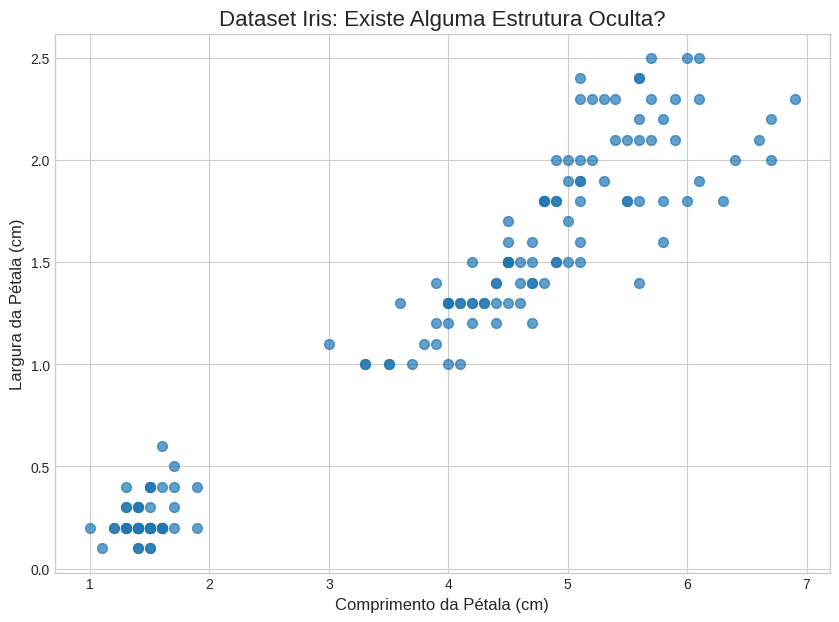

In [34]:
# Vamos visualizar duas features: comprimento da pétala (coluna 2) e largura da pétala (coluna 3)
plt.figure(figsize=(10, 7))
plt.scatter(X_iris[:, 2], X_iris[:, 3], s=50, alpha=0.7)

plt.title('Dataset Iris: Existe Alguma Estrutura Oculta?', fontsize=16)
plt.xlabel('Comprimento da Pétala (cm)', fontsize=12)
plt.ylabel('Largura da Pétala (cm)', fontsize=12)
plt.grid(True)
plt.show()

### Revelando os Grupos

Como este é um dataset clássico usado para ensino, nós temos acesso às "respostas": a espécie real de cada flor. Agora, vamos plotar o mesmo gráfico, mas colorindo cada ponto de acordo com sua espécie. Isso nos permite verificar se a estrutura que intuímos visualmente corresponde aos agrupamentos reais.

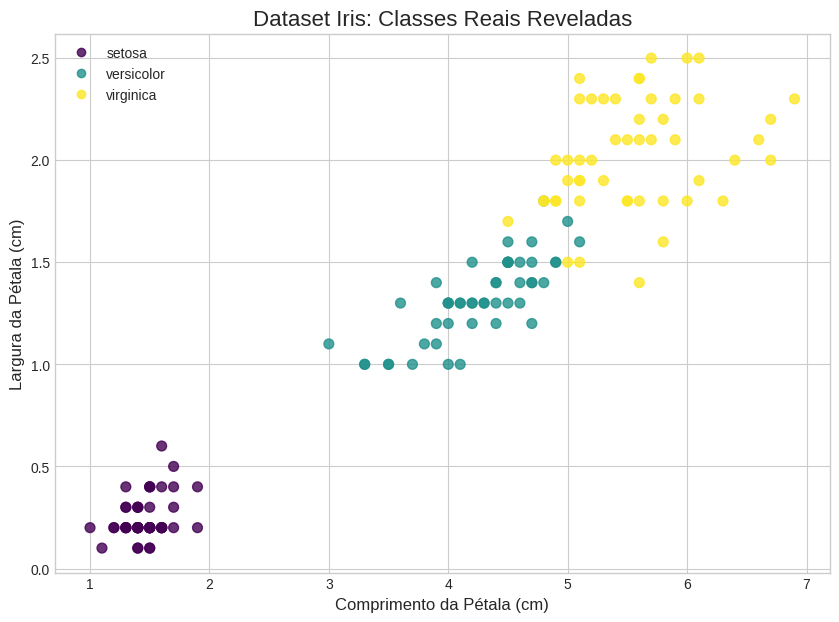

In [35]:
# O objeto 'iris' já contém os rótulos (a espécie de cada flor) em iris.target
y_iris = iris.target

plt.figure(figsize=(10, 7))
# Usamos o parâmetro 'c=y_iris' para que o matplotlib use os rótulos para colorir os pontos
scatter = plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris, s=50, alpha=0.8, cmap='viridis')

plt.title('Dataset Iris: Classes Reais Reveladas', fontsize=16)
plt.xlabel('Comprimento da Pétala (cm)', fontsize=12)
plt.ylabel('Largura da Pétala (cm)', fontsize=12)
plt.grid(True)

# Adicionando uma legenda para clareza
plt.legend(handles=scatter.legend_elements()[0], labels=list(iris.target_names))

plt.show()

## Exercícios

**Cenário: Monitoramento de Tráfego de API**

Uma equipe de engenharia de software monitora o uso de sua API, registrando o número de requisições de leitura (`GET`) e de escrita (`POST`) a cada hora durante um pico de uso.

* Hora 1: 1500 GETs, 400 POSTs
* Hora 2: 1800 GETs, 550 POSTs
* Hora 3: 1650 GETs, 480 POSTs
* Hora 4 (pico): 2500 GETs, 1200 POSTs

1. **Estruturação dos Logs:**  
a) Crie uma matriz de dados `api_log` no NumPy para organizar essa informação. As linhas devem representar as horas e as colunas os tipos de requisição.  
b) Imprima a matriz e seu `shape` para confirmar a estrutura.  

2. **Análise de Performance:**  
Usando a matriz `api_log` e as funções do NumPy, responda às seguintes questões para o período monitorado:  
a) Qual foi o **número total** de requisições `GET` que o servidor processou?  
b) Qual foi a **média** de requisições `POST` por hora?  
c) Durante a Hora 4 (pico), qual foi o **tráfego total** (soma de GETs e POSTs) que a API recebeu?  

In [46]:
import numpy as np

# Definindo os dados do cenário
log_hora1 = [1500, 400]
log_hora2 = [1800, 550]
log_hora3 = [1650, 480]
log_hora4 = [2500, 1200]

# 1. Estruturação dos Logs
# a) Criando a matriz de dados com as informações do log.
# Cada linha é uma hora, e cada coluna é um tipo de requisição.
api_log = np.array([log_hora1,
                    log_hora2,
                    log_hora3,
                    log_hora4])

# b) Imprimindo a matriz e seu shape para verificar a estrutura.
print("--- 1. Estruturação dos Logs ---")
print("Matriz de Logs (API_Log):")
print(api_log)
print("\nShape da matriz (linhas x colunas):", api_log.shape)

# As colunas são: Coluna 0 (GETs), Coluna 1 (POSTs).
# As linhas são: Linha 0 (Hora 1), Linha 1 (Hora 2), Linha 2 (Hora 3), Linha 3 (Hora 4).

# 2. Análise de Performance
# a) Calculando o número total de requisições GET.
# Somamos todos os valores da primeira coluna (índice 0).
total_gets = np.sum(api_log[:, 0])

# b) Calculando a média de requisições POST por hora.
# Calculamos a média de todos os valores da segunda coluna (índice 1).
media_posts = np.mean(api_log[:, 1])

# c) Calculando o tráfego total na Hora 4.
# Somamos os valores da última linha (índice 3).
trafego_hora4 = np.sum(api_log[3, :])

print("\n--- 2. Análise de Performance ---")
print(f"a) Número total de requisições GET: {total_gets}")
print(f"b) Média de requisições POST por hora: {media_posts:.2f}")
print(f"c) Tráfego total na Hora 4: {trafego_hora4}")
# ---

--- 1. Estruturação dos Logs ---
Matriz de Logs (API_Log):
[[1500  400]
 [1800  550]
 [1650  480]
 [2500 1200]]

Shape da matriz (linhas x colunas): (4, 2)

--- 2. Análise de Performance ---
a) Número total de requisições GET: 7450
b) Média de requisições POST por hora: 657.50
c) Tráfego total na Hora 4: 3700


# 4. Noção de Estrutura e Agrupamento

## 4.1 O que Significa "Encontrar Grupos"?

O objetivo central do agrupamento (*clustering*) é descobrir uma estrutura inerente em dados não rotulados. Imagine que você recebe uma caixa com diversas frutas misturadas. Sem nenhuma etiqueta, você naturalmente começaria a separá-las em grupos: maçãs com maçãs, bananas com bananas, e assim por diante.

Você faz isso com base nas *características* das frutas: cor, formato, tamanho. Em Machine Learning, o processo é análogo. O algoritmo "olha" para os atributos (as colunas da nossa matriz de dados) de cada amostra e tenta organizá-las em grupos, ou *clusters*, onde os membros de um grupo são mais parecidos entre si do que com os membros de outros grupos.

## 4.2 Definindo Proximidade no Espaço de Atributos

Como um computador mede a "similaridade" entre duas amostras? Ele faz isso calculando a **distância** entre seus vetores de atributos em um espaço n-dimensional.

Se cada amostra é um ponto nesse espaço, podemos usar a Distância Euclidiana (que já vimos) para determinar o quão "próximos" dois pontos estão. A intuição é simples: pontos que estão próximos uns dos outros no espaço de atributos são considerados similares e, portanto, provavelmente pertencem ao mesmo cluster.

### Clusters Claramente Separados

Vamos gerar alguns dados em um espaço 2D onde os grupos são visualmente óbvios. Este é o cenário ideal para um algoritmo de agrupamento, onde a separação entre os clusters é grande e a coesão dentro de cada cluster é alta.

In [36]:
from sklearn.datasets import make_blobs

# Gerando dados com 3 clusters bem definidos
# O y_blobs contém os rótulos verdadeiros, que usamos aqui apenas para colorir o gráfico
# Em um problema real, não teríamos acesso a 'y_blobs'
X_blobs, y_blobs = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)

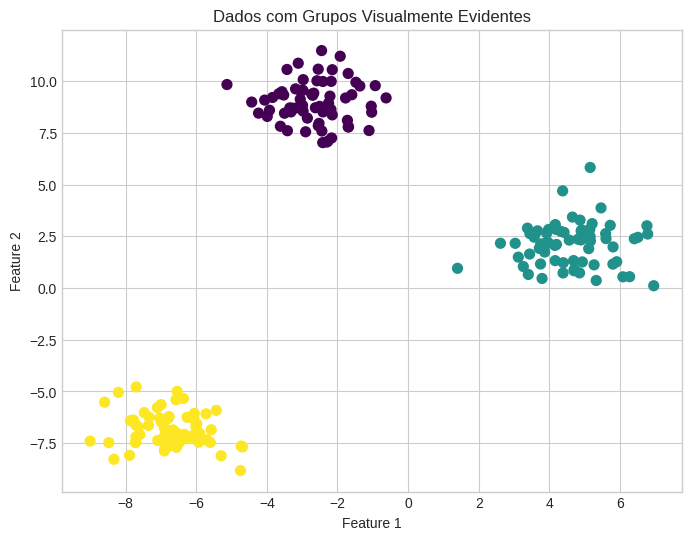

In [37]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=50, cmap='viridis')
plt.title('Dados com Grupos Visualmente Evidentes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

### Centróides

O **centróide** de um cluster é o ponto médio de todos os vetores (ou amostras) pertencentes a ele.  
Matematicamente, para um conjunto de pontos $\{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_m\}$ em $\mathbb{R}^n$, o centróide é dado por:

$$
\mathbf{c} = \frac{1}{m} \sum_{i=1}^{m} \mathbf{x}_i
$$

Ou seja, é simplesmente a média de todas as coordenadas dos pontos dentro de um cluster.  
Ele representa a "posição central" daquele grupo e é amplamente usado em algoritmos de aprendizado não supervisionado, como o **K-Means**.

Cluster 0: centróide = [-2.65882129  8.95756821]
Cluster 1: centróide = [4.63218228 2.10121377]
Cluster 2: centróide = [-6.74539381 -6.85144337]


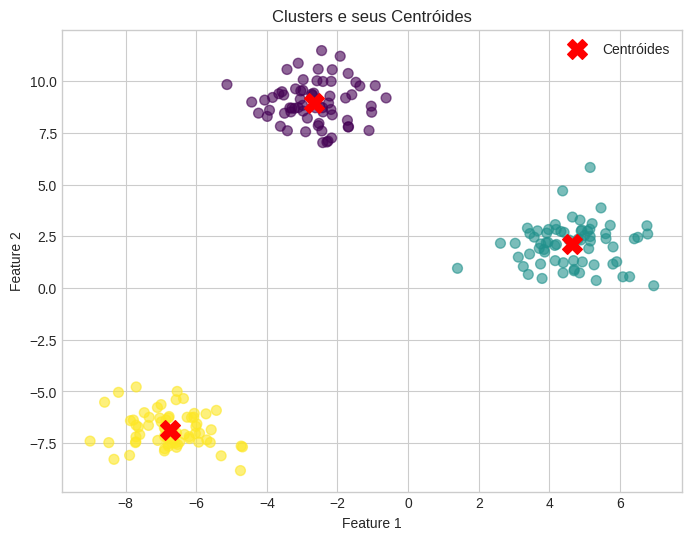

In [38]:
# Calculando centróides manualmente
centroids = []
for cluster_id in np.unique(y_blobs):
    points = X_blobs[y_blobs == cluster_id]
    centroid = points.mean(axis=0)
    centroids.append(centroid)
    print(f"Cluster {cluster_id}: centróide = {centroid}")

# Convertendo para array para usar em visualizações
centroids = np.array(centroids)

# Plotando dados e centróides
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=50, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centróides')
plt.title('Clusters e seus Centróides')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### O Desafio das Estruturas Complexas

O mundo real raramente é tão organizado quanto o exemplo anterior. Os "grupos" nos dados podem ter formatos que não são simplesmente esféricos ou podem estar muito próximos uns dos outros.

- E se um cluster tiver o formato de uma lua ou um anel?
- E se os clusters tiverem densidades diferentes (um muito espalhado e outro muito concentrado)?

Algoritmos simples, baseados apenas em distância do centro do cluster, podem falhar nesses cenários mais complexos.

In [39]:
from sklearn.datasets import make_moons

# Gerando dados com estruturas não-esféricas (formato de luas)
X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

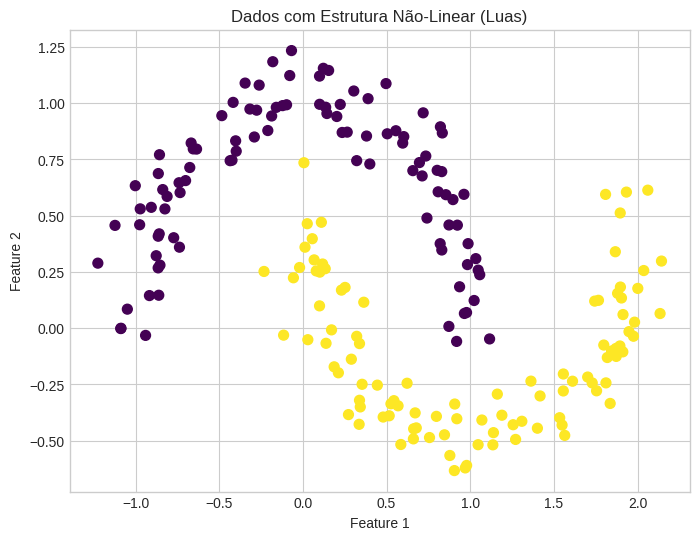

In [40]:
# Plotando os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=50, cmap='viridis')
plt.title('Dados com Estrutura Não-Linear (Luas)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Exercícios

**Cenário: Controle de Qualidade de Café**

Uma cooperativa de café usa uma máquina para classificar grãos com base em duas características medidas por um sensor óptico: `intensidade da cor` e `tamanho do grão`. Grãos de alta qualidade tendem a ter características diferentes dos grãos de baixa qualidade.

1. **Simulação e Visualização**

    a) Simule os dados de uma amostra de grãos. Use `make_blobs` para criar dois grupos de pontos:  

    * **Alta Qualidade:** 80 grãos, centrado em `[8, 5]` (cor, tamanho), com desvio padrão (`cluster_std`) de `0.8`.  
    * **Baixa Qualidade:** 40 grãos, centrado em `[4, 3]`, com desvio padrão de `0.6`.  

    b) Junte os dois grupos em uma única matriz de dados. (Dica: `np.vstack`).  

    c) Crie um gráfico de dispersão para todos os grãos (sem usar cores para diferenciar os grupos). Olhando para o gráfico, você consegue identificar visualmente os dois grupos de qualidade? Eles estão bem separados?

2. **Cálculo de Centroides e Distâncias**

    a) Calcule o **centroide** de cada grupo (Alta e Baixa Qualidade) usando a média das coordenadas de seus pontos.

    b) Plote os centroides no gráfico de dispersão anterior

3. **Tomada de Decisão**

    a) Um novo grão passa pelo sensor e registra as medições:

    $$
    \text{novo\_grao} = [7.5, \, 4.8]
    $$

    b) Adicione este novo ponto ao seu gráfico, mas com uma cor e um marcador diferentes (por exemplo, um 'X' vermelho e maior) para destacá-lo.  

    c) Calcule a **distância euclidiana** do novo grão até cada centroide.  

    $$
    d(\mathbf{x}, \mathbf{c}) = \sqrt{(x_1 - c_1)^2 + (x_2 - c_2)^2}
    $$

    d) Escreva uma função `classificar_ponto` que receba as coordenadas de um ponto e uma lista de centroides, calcule as distâncias e retorne o rótulo do cluster mais próximo (Alta ou Baixa Qualidade).

--- 1. Simulação e Visualização ---
Matriz de todos os grãos. Shape: (120, 2)
Grãos de Alta Qualidade (primeiras 5 linhas):
 [[8.04818417 6.97059369]
 [8.07766204 5.77491599]
 [7.56449382 5.08873807]
 [7.51863471 6.48182255]
 [8.46948568 6.7523645 ]]

Grãos de Baixa Qualidade (últimas 5 linhas):
 [[3.49646949 2.81447257]
 [3.63961679 2.82498375]
 [3.11288681 2.56809347]
 [3.97850438 3.93878619]
 [4.19875806 3.58532708]]


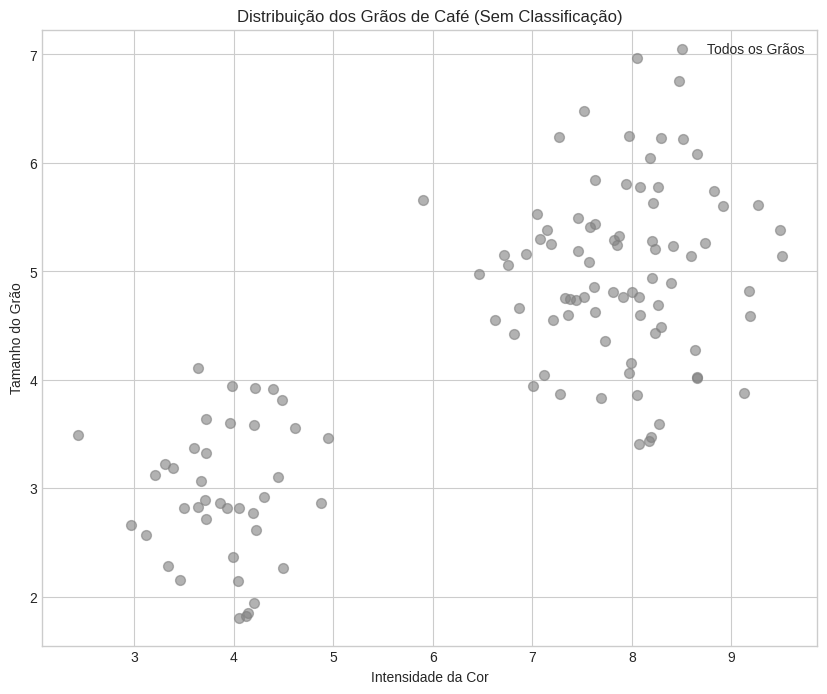


Análise do Gráfico:
Olhando para o gráfico, é possível identificar dois grupos distintos de grãos. O grupo à direita (com maior cor e tamanho) e o grupo à esquerda (com menor cor e tamanho) parecem bem separados. Isso indica que a classificação por essas duas características seria eficaz.

--- 2. Cálculo de Centroides ---
Centroide de Alta Qualidade: [7.9 5. ]
Centroide de Baixa Qualidade: [3.9  2.96]


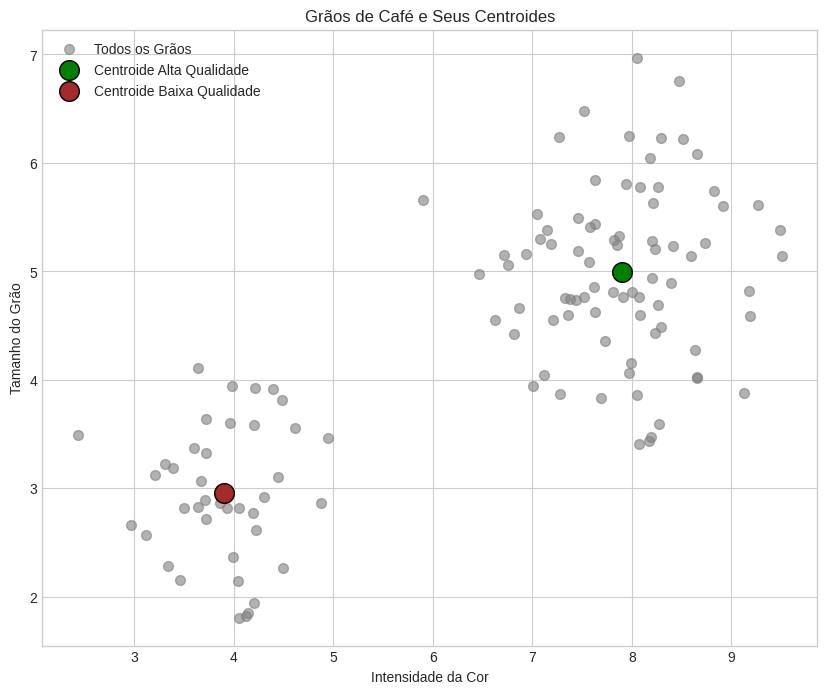

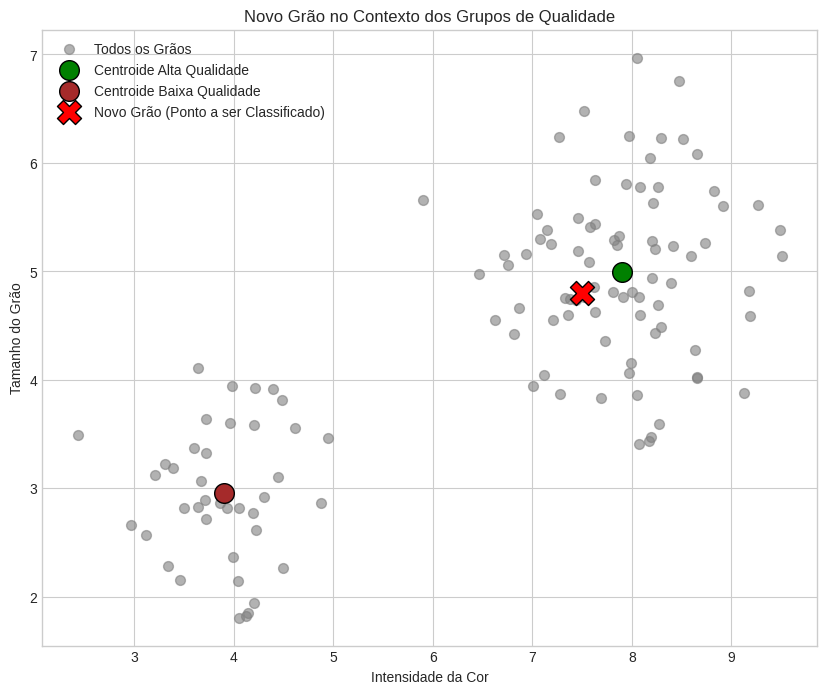


--- 3. Tomada de Decisão ---
Distância do novo grão para o Centroide de Alta Qualidade: 0.4417
Distância do novo grão para o Centroide de Baixa Qualidade: 4.0486

O novo grão foi classificado como: Alta Qualidade
Isso faz sentido, pois a distância para o centroide de Alta Qualidade é menor, indicando maior proximidade.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Simulação e Visualização

# a) Simulando os dados dos dois grupos de grãos
# Grupo de Alta Qualidade
X_alta_qualidade, _ = make_blobs(n_samples=80, centers=[[8, 5]], cluster_std=0.8, random_state=42)
# Grupo de Baixa Qualidade
X_baixa_qualidade, _ = make_blobs(n_samples=40, centers=[[4, 3]], cluster_std=0.6, random_state=42)

# b) Juntando os dois grupos em uma única matriz de dados
X_todos_graos = np.vstack([X_alta_qualidade, X_baixa_qualidade])

print("--- 1. Simulação e Visualização ---")
print(f"Matriz de todos os grãos. Shape: {X_todos_graos.shape}")
print("Grãos de Alta Qualidade (primeiras 5 linhas):\n", X_todos_graos[:5])
print("\nGrãos de Baixa Qualidade (últimas 5 linhas):\n", X_todos_graos[-5:])

# c) Criando o gráfico de dispersão
plt.figure(figsize=(10, 8))
plt.scatter(X_todos_graos[:, 0], X_todos_graos[:, 1], s=50, c='grey', alpha=0.6, label='Todos os Grãos')

plt.xlabel('Intensidade da Cor')
plt.ylabel('Tamanho do Grão')
plt.title('Distribuição dos Grãos de Café (Sem Classificação)')
plt.grid(True)
plt.legend()
plt.show()

print("\nAnálise do Gráfico:\nOlhando para o gráfico, é possível identificar dois grupos distintos de grãos. O grupo à direita (com maior cor e tamanho) e o grupo à esquerda (com menor cor e tamanho) parecem bem separados. Isso indica que a classificação por essas duas características seria eficaz.")


# a) Calculando o centroide de cada grupo
centroide_alta = np.mean(X_alta_qualidade, axis=0)
centroide_baixa = np.mean(X_baixa_qualidade, axis=0)

print("\n--- 2. Cálculo de Centroides ---")
print(f"Centroide de Alta Qualidade: {centroide_alta.round(2)}")
print(f"Centroide de Baixa Qualidade: {centroide_baixa.round(2)}")

# b) Plotando os centroides no gráfico
plt.figure(figsize=(10, 8))
plt.scatter(X_todos_graos[:, 0], X_todos_graos[:, 1], s=50, c='grey', alpha=0.6, label='Todos os Grãos')
plt.scatter(centroide_alta[0], centroide_alta[1], s=200, c='green', marker='o', edgecolors='black', label='Centroide Alta Qualidade')
plt.scatter(centroide_baixa[0], centroide_baixa[1], s=200, c='brown', marker='o', edgecolors='black', label='Centroide Baixa Qualidade')

plt.xlabel('Intensidade da Cor')
plt.ylabel('Tamanho do Grão')
plt.title('Grãos de Café e Seus Centroides')
plt.grid(True)
plt.legend()
plt.show()



# a) Definindo o novo grão
novo_grao = np.array([7.5, 4.8])

# b) Adicionando o novo grão ao gráfico
plt.figure(figsize=(10, 8))
plt.scatter(X_todos_graos[:, 0], X_todos_graos[:, 1], s=50, c='grey', alpha=0.6, label='Todos os Grãos')
plt.scatter(centroide_alta[0], centroide_alta[1], s=200, c='green', marker='o', edgecolors='black', label='Centroide Alta Qualidade')
plt.scatter(centroide_baixa[0], centroide_baixa[1], s=200, c='brown', marker='o', edgecolors='black', label='Centroide Baixa Qualidade')
plt.scatter(novo_grao[0], novo_grao[1], s=300, c='red', marker='X', edgecolors='black', label='Novo Grão (Ponto a ser Classificado)', zorder=10)

plt.xlabel('Intensidade da Cor')
plt.ylabel('Tamanho do Grão')
plt.title('Novo Grão no Contexto dos Grupos de Qualidade')
plt.grid(True)
plt.legend()
plt.show()

# c) Calculando a distância euclidiana do novo grão para cada centroide
distancia_alta = np.linalg.norm(novo_grao - centroide_alta)
distancia_baixa = np.linalg.norm(novo_grao - centroide_baixa)

print("\n--- 3. Tomada de Decisão ---")
print(f"Distância do novo grão para o Centroide de Alta Qualidade: {distancia_alta:.4f}")
print(f"Distância do novo grão para o Centroide de Baixa Qualidade: {distancia_baixa:.4f}")

# d) Função de classificação
def classificar_ponto(ponto, centroides):
    distancias = [np.linalg.norm(ponto - centroide) for centroide in centroides]
    indice_mais_proximo = np.argmin(distancias)

    if indice_mais_proximo == 0:
        return 'Alta Qualidade'
    else:
        return 'Baixa Qualidade'

# Usando a função para classificar o novo grão
centroides = [centroide_alta, centroide_baixa]
classificacao = classificar_ponto(novo_grao, centroides)

print(f"\nO novo grão foi classificado como: {classificacao}")
print("Isso faz sentido, pois a distância para o centroide de Alta Qualidade é menor, indicando maior proximidade.")